# Name : Tharindu O.K.D {-}
# Index No. : 190622R {-}

### Question 01 {-}

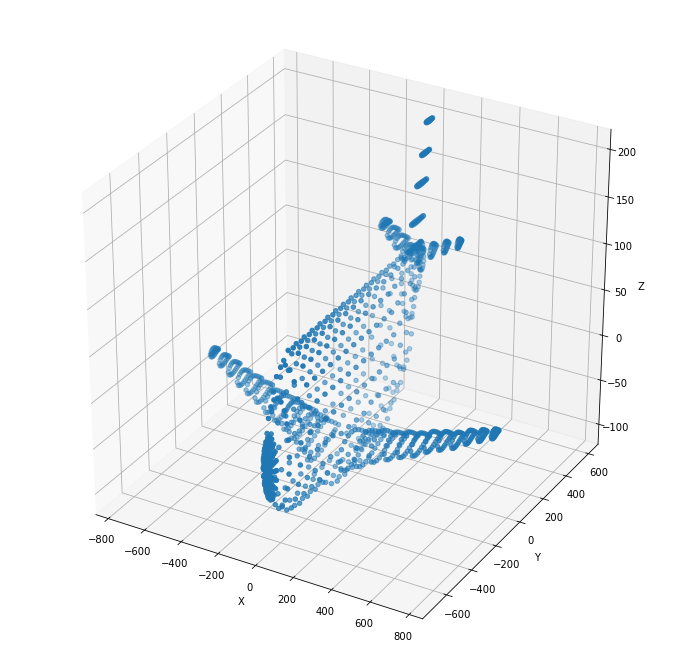

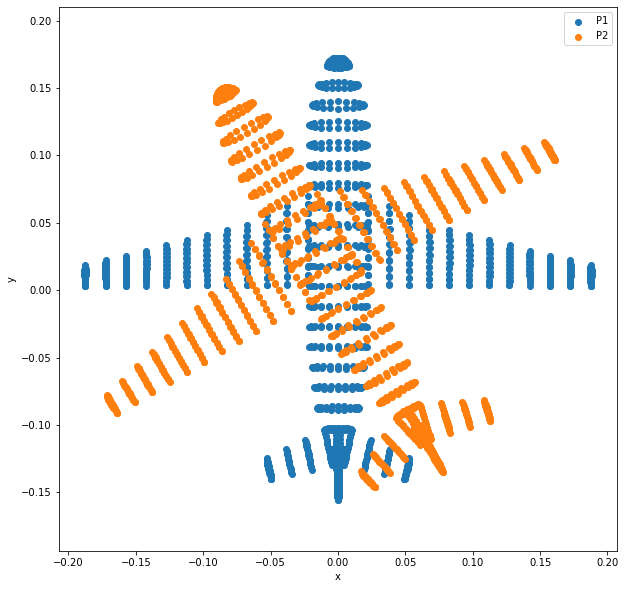

In [10]:
import numpy as np
from plyfile import PlyData, PlyElement
import matplotlib.pyplot as plt
pcd = PlyData.read(r"airplane.ply")
assert pcd is not None

points = np.concatenate((pcd['vertex']['x'].reshape(1, -1), pcd['vertex']['y'].reshape(1, -1), pcd['vertex']['z'].reshape(1, -1)), axis=0)
points = points - np.mean(points, axis=1).reshape(3,1)
ones = np.ones((1, points.shape[1]))
X = np.concatenate((points, ones), axis=0)

R = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
K = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
t = np.array([[0],[0], [-4000]])
P1 = K @ np.concatenate((R, t), axis=1)

theta = 30*np.pi/180
R = np.array([[np.cos(theta), -np.sin(theta), 0], [np.sin(theta), np.cos(theta), 0], [0, 0, 1]])
K = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
t = np.array([[0],[0], [-4000]])
P2 = K @ np.concatenate((R, t), axis=1)

x1 = P1 @ X
x2 = P2 @ X
x1 = x1/x1[2,:]
x2 = x2/x2[2,:]

fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(points[0, :], points[1, :], points[2, :])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(10,10))
ax.scatter(x1[0,:], x1[1,:], label="P1")
ax.scatter(x2[0,:], x2[1,:], label="P2")
plt.legend()
ax.axis('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()

### Question 03 {-}

Item  1 area in pixels = 59143
Item  1 actual area = 2318.642172 mm^2
Item  2 area in pixels = 59211
Item  2 actual area = 2321.3080440000003 mm^2


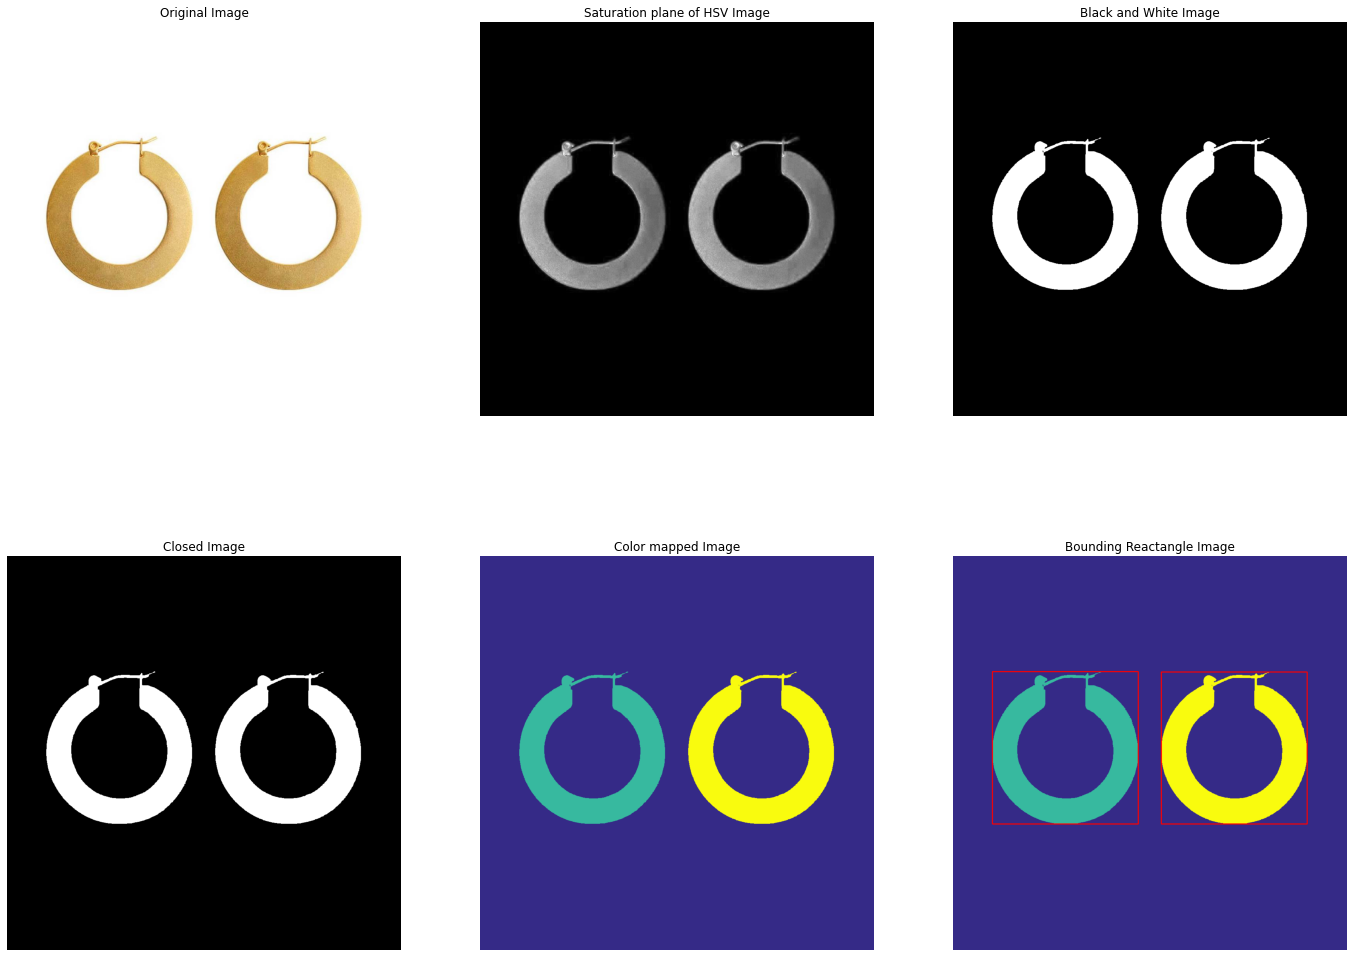

In [2]:
import cv2 as cv
img = cv.imread(r"earrings.jpg", cv.IMREAD_COLOR)
assert img is not None
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
th, bw = cv.threshold(hsv[:,:,1], 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

w = 5
kernel = np.ones((w,w), np.uint8)
opened = cv.morphologyEx(bw, cv.MORPH_CLOSE, kernel)

retval, labels, stats, centroids = cv.connectedComponentsWithStats(bw)
colormapped = cv.applyColorMap((labels/np.amax(labels)*255).astype('uint8'), cv.COLORMAP_PARULA)

Z =720
f = 8
for i, s in enumerate(stats):
    if i != 0:
        print("Item ", i, "area in pixels =", s[4])
        print("Item ", i, "actual area =", s[4]*(2.2e-3)**2*(Z**2)/(f**2), "mm^2")

bound_img = colormapped.copy()
cnts = cv.findContours(bw, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    x,y,w,h = cv.boundingRect(c)
    cv.rectangle(bound_img, (x, y), (x + w, y + h), (0,0,255), 2)

fig, ax = plt.subplots(2, 3, figsize=(24,18))
ax[0, 0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
ax[0, 0].set_title("Original Image")
ax[0, 1].imshow(hsv[:,:,1], cmap="gray")
ax[0, 1].set_title("Saturation plane of HSV Image")
ax[0, 2].imshow(bw, cmap="gray")
ax[0, 2].set_title("Black and White Image")
ax[1, 0].imshow(opened, cmap="gray")
ax[1, 0].set_title("Closed Image")
ax[1, 1].imshow(cv.cvtColor(colormapped,cv.COLOR_BGR2RGB))
ax[1, 1].set_title("Color mapped Image")
ax[1, 2].imshow(cv.cvtColor(bound_img,cv.COLOR_BGR2RGB))
ax[1, 2].set_title("Bounding Reactangle Image")
for i in range(3):
    ax[0, i].axis("off")
    ax[1, i].axis("off")

### Question 04 {-}

(600, 600)


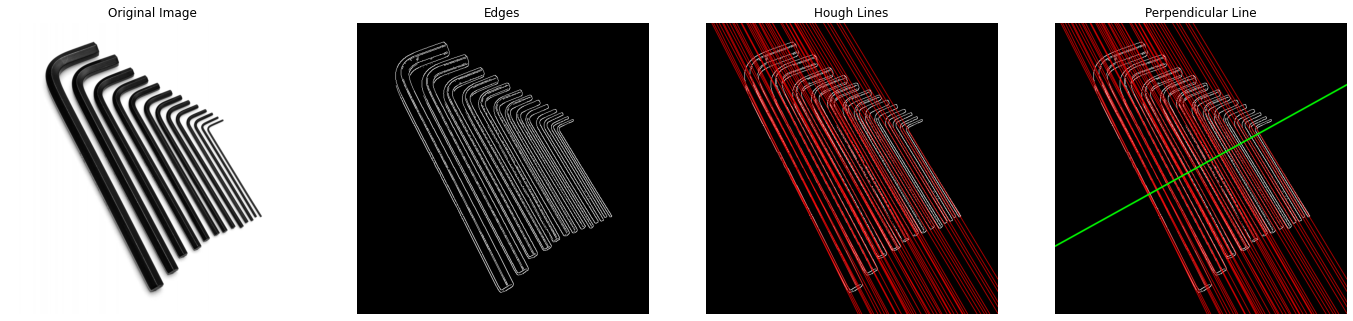

In [13]:
im = cv.imread("allenkeys.jpg" , cv.IMREAD_REDUCED_GRAYSCALE_2)
canny = cv .Canny(im, 50, 150)
canny_color = cv.cvtColor(canny,cv.COLOR_GRAY2BGR)
lines = cv.HoughLines(canny, 1, np.pi / 180, 170, None, 0, 0)
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines [i][0][1]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b) ), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b) ), int(y0 - 1000*(a)))
        cv.line(canny_color, pt1, pt2, (0 ,0 ,255), 1, cv.LINE_AA)

fig, ax = plt.subplots(1, 4, figsize=(24,18))
ax[0].imshow(im,cmap="gray")
ax[0].set_title("Original Image")
ax[1].imshow(canny, cmap="gray")
ax[1].set_title("Edges")
ax[2].imshow(cv.cvtColor(canny_color,cv.COLOR_BGR2RGB))
ax[2].set_title("Hough Lines")

cv.namedWindow("image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", canny_color)
r = cv.selectROI("Image" , canny_color , showCrosshair = True , fromCenter = False )
cv.waitKey(0)

x0, y0 = int(r[0] + r[2]/2), int(r[1] + r[3]/2)
m = b/a
m = np.tan(np.median(lines[:, 0, 1]))
c = y0 - m*x0
cv.line(canny_color, (0, int(c)), (im.shape[0], int(m*im.shape[0] + c )), (0, 255, 0), 2, cv.LINE_AA)
cv.imshow("Image", canny_color)
cv.waitKey(0)
cv.destroyAllWindows()

dy = 1
y_sub_pixel = np.arange(0, im.shape[0] - 1, dy)
f_sub_pixel = np.zeros_like(y_sub_pixel)
f_sub_pixel_nn = np.zeros_like(y_sub_pixel)

for i , y in enumerate(y_sub_pixel):
    y=1
ax[3].imshow(cv.cvtColor(canny_color,cv.COLOR_BGR2RGB))
ax[3].set_title("Perpendicular Line")

for i in range(4):
    ax[i].axis("off")
    ax[i].axis("off")